In [73]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import sklearn.model_selection as ms
import sklearn.utils as su
from sklearn import metrics
from tables.table import Col
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import LabelEncoder

In [105]:
# Import data
data = pd.read_csv('/content/sample_data/diabetic_data.csv')

#Process missing data
def process_missing_data(data):
    impute = SimpleImputer(missing_values='?', strategy='most_frequent')
    impute.fit(data)
    data = impute.transform(data)
    return(data)

data=process_missing_data(data)

#Label Encoder
def DoLabelEncoder(data,i):
    encoder_x=LabelEncoder()
    data[:,i]=encoder_x.fit_transform(data[:,i])

list_data = []
i_list_data = []

for i in data[0]:
    list_data.append(isinstance(i, str))
for i in range(len(list_data)):
    if list_data[i] == True:
        i_list_data.append(i)
print(i_list_data)

for i in i_list_data:
    DoLabelEncoder(data,i)  

"""#Split the data
train = np.matrix(data[:70000])
test = np.matrix(data[70001:])"""

# Fit data to KMeans model
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)


[2, 3, 4, 5, 10, 11, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


KMeans(n_clusters=3)

In [106]:
# Calculate sum of least square error for different values of 'k'
errors = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(data)
  errors.append(kmeans.inertia_)

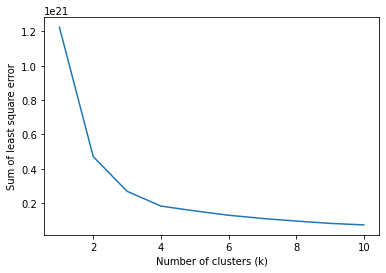

In [107]:
# Optimal number (best k is at the point where the elbow shape occurs which is 3 here)
plt.plot(range(1, 11), errors)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of least square error')
plt.show()

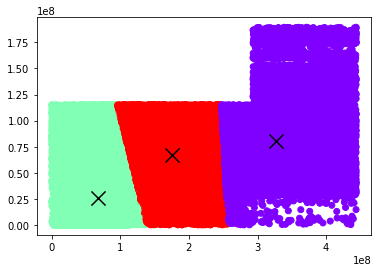

In [108]:
# Visualization
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)
plt.scatter(data[:,0], data[:,1], c=kmeans.labels_, cmap='rainbow')

# Plot centroids(x)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0], centroids[:,1], marker='x', s=200, c='black')
plt.show()
